### Урок 2. Дискретные случайные величины. Закон распределения вероятностей. Биномиальный закон распределения. Распределение Пуассона

#### Задача 1
Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

#### Решение 1
Т.к. количество испытаний неизвестно, испытания независимы и могут происходить с одинаковой вероятностью, следовательно закон распределения - биномиальный.

n = 5
p = 0.25

$$P_5(X=k) = C_5^k\cdot{0.25^k}\cdot{0.75^{5-k}}$$

$$M(X) = n\cdot{p} = 5 * 0.25 = 1.25$$

$$D(X) = n\cdot{p}\cdot{(1-p)} = 5\cdot{0.25}\cdot{0.75} = 0.9375$$

In [2]:
5 * 0.25 * 0.75

0.9375

#### Задача 2
Вероятность попадания в цель при одном выстреле равна 0.01. Какова вероятность того, что число попаданий при 200 выстрелах будет не менее 5 и не более 10?

#### Решение 2
Т.к. вероятность по отношению к числу попаданий мала и число испытаний определено, следовательно можно применить закон распределения редких явлений.

$$a = n\cdot{p} = 0.01\cdot{200} = 2$$

$$5\leq{k}\leq{10}$$

$$P(5\leq{X}\leq{10}) = \displaystyle\sum_{k = 5}^{10} \dfrac{2^{k} e^{-2}}{k!}$$

Ответ: вероятность = 0.052644709119342686

In [8]:
import numpy as np

def poisson_proba(k, a):
    
    return (a ** k) * (np.exp(-a)) / np.math.factorial(k)

In [9]:
a = 2
sum(poisson_proba(i, a) for i in range(5, 11))

0.052644709119342686

#### Задача 3
В условиях предыдущей задачи сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 10 раз будет совершено попадание?
Подсказка. Как посчитать P(X >= k) для величины X, имеющей биномиальное распределение? Здесь предстоит немножко покодить.

#### Решение 3:
Используем формулу Бернулли: $$P(X = k) = C_n^k p^k (1 - p)^{n - k}$$

Требуется найти n.

$$k = 10$$
$$P(X\ge{k})\ge{0.9}$$

Из условия предыдущей задачи:
$$p=0.01$$

Итоговая формула:
$$C_n^{10}\cdot{0.01^{10}}\cdot(1 - 0.01)^{n - 10}\ge{0.9}$$

In [30]:
# Формула для комбинаций из предыдущего урока
def combinations(n, k):
    return np.math.factorial(n) // (np.math.factorial(k) * np.math.factorial(n - k))

# Итоговая формула
def bernulli_proba(n):
    return combinations(n, 10) * 0.01 ** 10 * (1-0.01) ** (n-10)

In [34]:
n = k = 10 # т.к. общее количество испытаний не может быть меньше количества бросков из условия задачи

y = []
while (bernulli_proba(n) < 0.9) & (n < 10000):
    y.append(bernulli_proba(n))
    n += 1

print(f'Ответ: {n} выстрелов')

Ответ: 10000 выстрелов


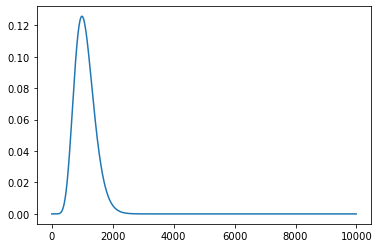

In [36]:
import matplotlib.pyplot as plt
plt.plot(y)

In [39]:
max(y)

0.12574021112620629

Вывод: из графика видно, что вероятность 0.9 никогда не будет достигнута.